In [42]:
from pysus.online_data.ESUS import download
import pandas as pd

# Downloading data from ESUS
This function alows for the download of COVID-19 data from ESUS. For Some States, the size of the resulting table can easily exceed the memory size of most personal computers, in such cases, the ESUS download function will stream the data to disk without filling up the memory and return an iterator of chunks of 1000 rows of data. The user must then iterate over the chunks to analyze the data.

In [43]:
df = download(uf='se').read()

2023-04-12 09:21:40.709 | INFO     | pysus.online_data.ESUS:download:34 - Local csv file found at /home/luabida/pysus/ESUS_temp_SE.csv.gz
/tmp/ipykernel_91880/506159845.py:1: DtypeWarning: Columns (2,4,5,8,9,10,11,12,15,18,19,21,22,23,24,26,27,29,30,31,32,34,35,36,37,40,41,42,44,45,46,48,49,50,51,54,55,56,57,58,59,60,61) have mixed types. Specify dtype option on import or set low_memory=False.
  df = download(uf='se').read()


In [44]:
df.head()

,Unnamed: 0,outrasCondicoes,municipio,resultadoTesteSorologicoIgM,laboratorioSegundaReforcoDose,dataTesteSorologico,codigoBuscaAtivaAssintomatico,recebeuAntiviral,profissionalSeguranca,cbo,...,testes,idade,resultadoTesteSorologicoTotais,codigoEstrategiaCovid,outrosSintomas,codigoQualAntiviral,estrangeiro,resultadoTesteSorologicoIgA,sexo,sintomas
0,0,NaN,Aracaju,NaN,NaN,NaN,NaN,NaN,Não,NaN,...,[],18,NaN,1,NaN,NaN,NaN,NaN,Feminino,"Coriza, Dor de Cabeça, Febre, Dor de Garganta"
1,1,NaN,Aracaju,NaN,JANSSEN,NaN,NaN,Não,Não,NaN,...,"[{'codigoEstadoTeste': '3', 'tipoTeste': 'RT-P...",26,NaN,1,NaN,NaN,NaN,NaN,Feminino,"Tosse, Febre, Dor de Garganta"
2,2,NaN,Nossa Senhora do Socorro,NaN,ASTRAZENECA/FIOCRUZ,NaN,NaN,Não,Não,NaN,...,"[{'codigoEstadoTeste': '3', 'tipoTeste': 'RT-P...",31,NaN,1,NaN,NaN,NaN,NaN,Masculino,"Tosse, Febre, Dor de Garganta"
3,3,NaN,Aracaju,NaN,PFIZER,NaN,NaN,NaN,Não,NaN,...,[],39,NaN,1,NaN,NaN,NaN,NaN,Masculino,"Coriza, Dor de Cabeça, Tosse, Febre, Dor de Ga..."
4,4,NaN,Aracaju,NaN,NaN,NaN,NaN,Não,Não,NaN,...,"[{'codigoEstadoTeste': '3', 'tipoTeste': 'TEST...",32,NaN,1,ALGIA OCULAR,NaN,NaN,NaN,Feminino,"Dor de Cabeça, Tosse, Outros"


In [45]:
for cname in df:
    if cname.startswith('data'):
        df[cname] = pd.to_datetime(df[cname], errors='coerce')

/home/luabida/micromamba/envs/pysus/lib/python3.9/site-packages/pandas/core/tools/datetimes.py:1047: UserWarning: Parsing '15/03/2022' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905099 entries, 0 to 905098
Data columns (total 63 columns):
 #   Column                             Non-Null Count   Dtype              
---  ------                             --------------   -----              
 0   Unnamed: 0                         905099 non-null  int64              
 1   outrasCondicoes                    845124 non-null  object             
 2   municipio                          60015 non-null   object             
 3   resultadoTesteSorologicoIgM        347694 non-null  object             
 4   laboratorioSegundaReforcoDose      846885 non-null  object             
 5   dataTesteSorologico                0 non-null       datetime64[ns]     
 6   codigoBuscaAtivaAssintomatico      352115 non-null  object             
 7   recebeuAntiviral                   900105 non-null  object             
 8   profissionalSeguranca              137182 non-null  object             
 9   cbo                                86

Now we will create a datetime index for our dataframe, but we must be carefull with missing dates here. For now, to enable a quick visualization, we will simply coerce missing dates to `NaT`.

In [47]:
df['datesint'] = pd.to_datetime(df['dataInicioSintomas'],errors='coerce')
# df = df.dropna()
df.set_index('datesint', inplace=True);

Now we can count the cases per day and plot.

In [48]:
df_day = df.resample('D').count()
df_day.head()

,Unnamed: 0,outrasCondicoes,municipio,resultadoTesteSorologicoIgM,laboratorioSegundaReforcoDose,dataTesteSorologico,codigoBuscaAtivaAssintomatico,recebeuAntiviral,profissionalSeguranca,cbo,...,testes,idade,resultadoTesteSorologicoTotais,codigoEstrategiaCovid,outrosSintomas,codigoQualAntiviral,estrangeiro,resultadoTesteSorologicoIgA,sexo,sintomas
datesint,,,,,,,,,,,,,,,,,,,,,
1970-01-01 00:00:00+00:00,33,21,33,0,0,0,31,33,33,8,...,33,8,0,0,0,4,33,33,0,33
1970-01-02 00:00:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1970-01-03 00:00:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1970-01-04 00:00:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1970-01-05 00:00:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


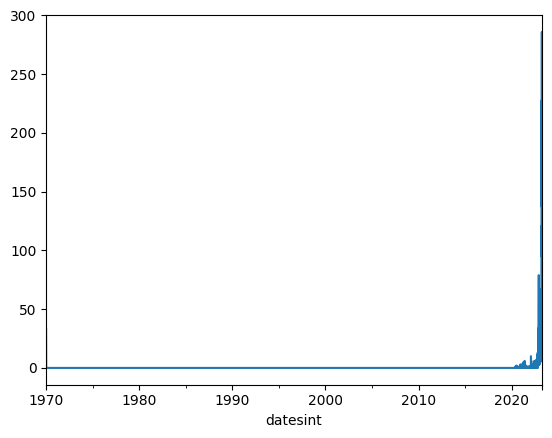

In [49]:
df_day.estadoIBGE.plot();

## Deduplicating the data
ESUS records are know to have a number of duplicated records. Let's see here how to detect possible duplicates in the dataframe we have just downloaded.  For that we will need the [`recordlinkage`](https://recordlinkage.readthedocs.io/en/latest/index.html) package.

In [50]:
!pip3 install recordlinkage

In [51]:
import recordlinkage

In [52]:
df.reset_index(inplace=True)
df['dataInicioSintomas'] = pd.to_datetime(df['dataInicioSintomas'], errors='coerce')

In [53]:
dup_index = recordlinkage.Index()
dup_index.block(['municipio','dataTeste'])
# dup_index.sortedneighbourhood(['municipio','dataTeste'])
dup_candidates = dup_index.index(df)
len(dup_candidates)

3154

In [54]:
dup_candidates

MultiIndex([( 3450,  1020),
            ( 4995,  1581),
            (18524,  3101),
            (57863, 12167),
            (57897, 12167),
            (57897, 57863),
            (35208, 12291),
            (56484, 12291),
            (56484, 35208),
            (74707, 12291),
            ...
            (74583, 58130),
            (74542, 58174),
            (74610, 58174),
            (74610, 74542),
            (74630, 58174),
            (74630, 74542),
            (74630, 74610),
            (58921, 58491),
            (74258, 74188),
            (74606, 74587)],
           length=3154)

In [55]:
compare_dups = recordlinkage.Compare()
compare_dups.string('sintomas', 'sintomas', threshold=0.85, label='sintomas', method='jarowinkler')
compare_dups.date('dataInicioSintomas', 'dataInicioSintomas', label='dataInicioSintomas')

<Compare>

In [56]:
dup_features = compare_dups.compute(dup_candidates,df)

ValueError: Left column is not of type datetime64[ns]

In [ ]:
dup_features

NameError: name 'dup_features' is not defined

In [ ]:
dup_features.sum(axis=1).value_counts().sort_index(ascending=False)

1.0     5910561
0.0    28495991
dtype: int64

In [ ]:
potential_dups = dup_features[dup_features.sum(axis=1) >= 1]#.reset_index()
# potential_dups['Score'] = potential_dups.loc[:, 'sintomas':'dataInicioSintomas'].sum(axis=1)

In [ ]:
potential_dups

sintomas
9      5            1.0
12     3            1.0
15     3            1.0
       12           1.0
23     3            1.0
...                 ...
380990 380953       1.0
381048 381019       1.0
381050 381019       1.0
       381048       1.0
381057 380939       1.0

[5910561 rows x 1 columns]

In [ ]:
potential_dups